In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
#pip install pandas openpyxl
import sys
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/MusicData.xlsx',sheet_name='Sheet1', engine='openpyxl')

In [3]:
data

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN
...,...,...,...,...,...
3060,Synchronization,Value (Adjusted),2021,1,331.056625
3061,Synchronization,Value (Adjusted),2022,1,382.500721
3062,Vinyl Single,Value (Adjusted),2020,1,7.143305
3063,Vinyl Single,Value (Adjusted),2021,1,8.530848


In [4]:
misslist=pd.Series(data.isna().sum().sort_values(ascending=False),name='missing')
misslist

Value (Actual)       1657
Format                  0
Metric                  0
Year                    0
Number of Records       0
Name: missing, dtype: int64

In [5]:
misslist1 = pd.Series((data == "NaN").sum().sort_values(ascending=False), name='missing')
misslist1

Format               0
Metric               0
Year                 0
Number of Records    0
Value (Actual)       0
Name: missing, dtype: int64

In [6]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nandata = data[data != "NaN"].dropna(how='any')

In [7]:
data[data["Year"]==2022]

,Format,Metric,Year,Number of Records,Value (Actual)
3010,CD,Value (Adjusted),2022,1,482.578147
3013,CD Single,Value (Adjusted),2022,1,6.818145
3016,DVD Audio,Value (Adjusted),2022,1,0.073177
3019,Download Album,Value (Adjusted),2022,1,241.864662
3022,Download Music Video,Value (Adjusted),2022,1,1.342922
3025,Download Single,Value (Adjusted),2022,1,214.141847
3028,Kiosk,Value (Adjusted),2022,1,0.396102
3031,LP/EP,Value (Adjusted),2022,1,1224.385495
3034,Limited Tier Paid Subscription,Value (Adjusted),2022,1,1063.012029
3037,Music Video (Physical),Value (Adjusted),2022,1,11.329987


In [8]:
data['Format'].unique()  

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization'], dtype=object)

In [9]:
m = data[data != "NaN"].dropna(how='any')

In [10]:
#m_adjust[m_adjust["Year"]==2022]

In [11]:
min(m['Year'])

1973

In [12]:
m_adjust =m[m['Metric'] == "Value (Adjusted)"]
m_adjust

,Format,Metric,Year,Number of Records,Value (Actual)
1927,8 - Track,Value (Adjusted),1973,1,2815.681824
1928,8 - Track,Value (Adjusted),1974,1,2848.008609
1929,8 - Track,Value (Adjusted),1975,1,2770.409498
1930,8 - Track,Value (Adjusted),1976,1,3047.215772
1931,8 - Track,Value (Adjusted),1977,1,3421.416287
...,...,...,...,...,...
3060,Synchronization,Value (Adjusted),2021,1,331.056625
3061,Synchronization,Value (Adjusted),2022,1,382.500721
3062,Vinyl Single,Value (Adjusted),2020,1,7.143305
3063,Vinyl Single,Value (Adjusted),2021,1,8.530848


In [13]:
m_adjust[m_adjust["Year"]==2022]

,Format,Metric,Year,Number of Records,Value (Actual)
3010,CD,Value (Adjusted),2022,1,482.578147
3013,CD Single,Value (Adjusted),2022,1,6.818145
3016,DVD Audio,Value (Adjusted),2022,1,0.073177
3019,Download Album,Value (Adjusted),2022,1,241.864662
3022,Download Music Video,Value (Adjusted),2022,1,1.342922
3025,Download Single,Value (Adjusted),2022,1,214.141847
3028,Kiosk,Value (Adjusted),2022,1,0.396102
3031,LP/EP,Value (Adjusted),2022,1,1224.385495
3034,Limited Tier Paid Subscription,Value (Adjusted),2022,1,1063.012029
3037,Music Video (Physical),Value (Adjusted),2022,1,11.329987


In [14]:

print(m_adjust.keys())

Index(['Format', 'Metric', 'Year', 'Number of Records', 'Value (Actual)'], dtype='object')


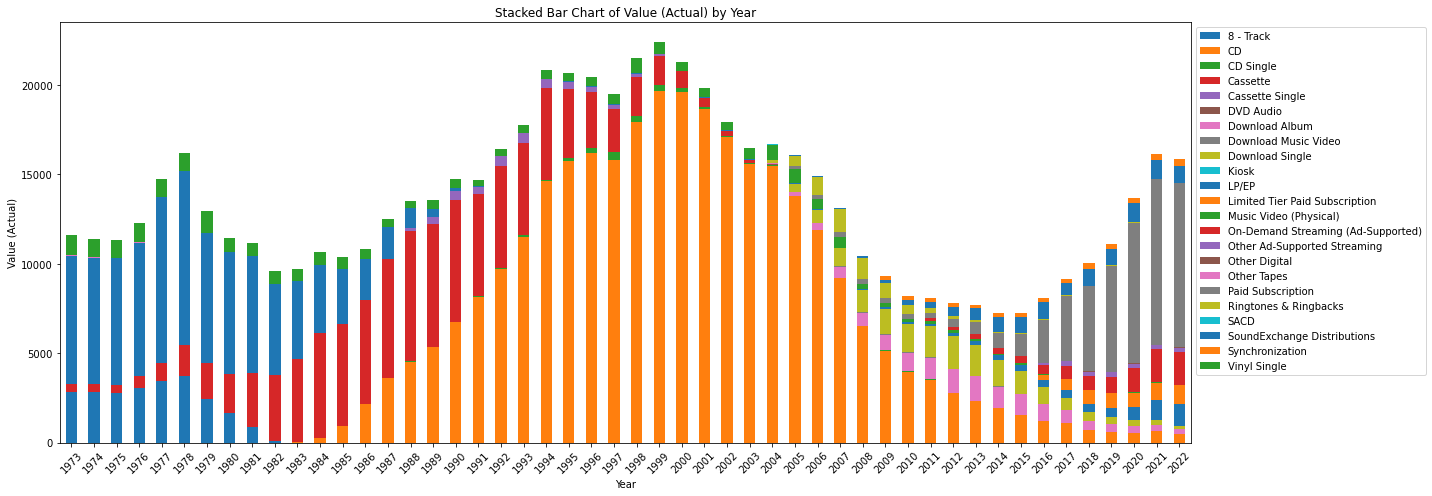

In [15]:
# Pivot the data to format it for a stacked bar chart

pivot_df = m_adjust.pivot(index='Year', columns='Format', values='Value (Actual)')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 7))

# Set titles and labels
plt.title('Stacked Bar Chart of Value (Actual) by Year')
plt.xlabel('Year')
plt.ylabel('Value (Actual)')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Move the legend outside of the chart
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()

In [16]:
mapping_principle = {
    'CD': 'Compact Disc',
    'CD Single': 'Compact Disc',
    'Cassette': 'Cassette',
    'Cassette Single': 'Cassette',
    'LP/EP': 'Vinyl Single',
    'Vinyl Single': 'Vinyl Single',
    '8 - Track': '8 - Track',
    'Other Tapes': 'Cassette',
    'Music Video (Physical)': 'Compact Disc',
    'DVD Audio': 'Compact Disc',
    'SACD': 'Compact Disc',
    'Download Single': 'MP3',
    'Download Album': 'MP3',
    'Kiosk': 'Compact Disc',
    'Download Music Video': 'MP3',
    'Ringtones & Ringbacks': 'Ringtone',
    'Paid Subscriptions': 'Streaming',
    'Limited Tier Paid Subscription': 'Streaming',
    'On-Demand Streaming (Ad-Supported)': 'Streaming',
    'Other Ad-Supported Streaming': 'Streaming',
    'Other Digital': 'MP3',
    'Paid Subscription': 'Streaming',
    'SoundExchange Distributions': 'Streaming'
}

# Replace the values in 'Format' column based on the mapping principle
m_adjust_newformat = m_adjust
m_adjust_newformat['Format'] = m_adjust_newformat['Format'].map(mapping_principle).fillna(m_adjust['Format'])


/var/folders/n_/2_08cx9j54l9v4h7jwztlpt80000gs/T/ipykernel_78909/2159696090.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_adjust_newformat['Format'] = m_adjust_newformat['Format'].map(mapping_principle).fillna(m_adjust['Format'])


In [17]:
m_adjust_newformat['Format'].unique()

array(['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single',
       'Streaming', 'Ringtone', 'Synchronization'], dtype=object)

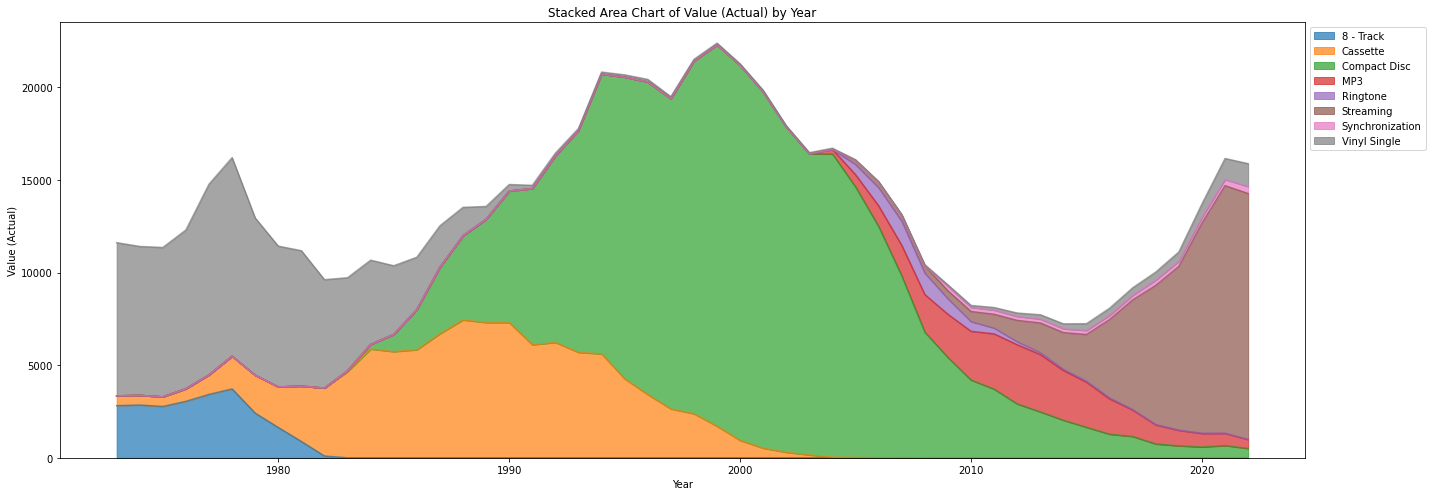

In [18]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value (Actual)', aggfunc='sum')

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(20, 7))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Stacked Area Chart of Value (Actual) by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Actual)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))




# Show the chart
plt.tight_layout()
plt.show()

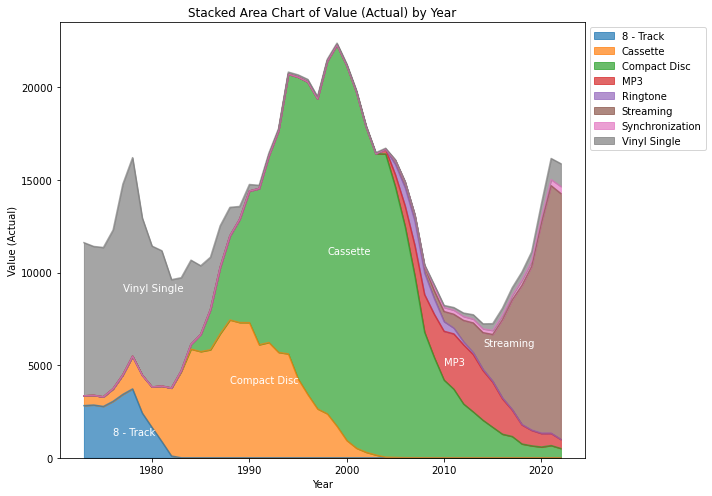

In [19]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value (Actual)', aggfunc='sum')

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(10, 7))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Stacked Area Chart of Value (Actual) by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Actual)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1976, 1200), (1988, 4000), (1998, 11000), (2010, 5000), (1977, 9000), (2014, 6000)]

for format_, position in zip(formats, positions):
    # Determine the size based on the height of the stack
    try:
        stack_height = pivot_area.loc[position[0], format_]
        text_size = max(10, min(20, 0.001 * stack_height))
    except:
        text_size = 10
    ax.text(position[0], position[1], format_, fontsize=text_size, color='white')

# Show the chart
plt.tight_layout()
plt.show()

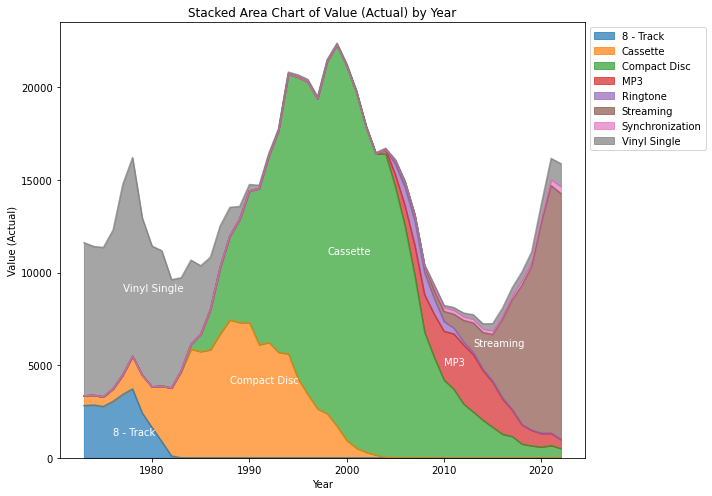

In [20]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value (Actual)', aggfunc='sum')

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(10, 7))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Stacked Area Chart of Value (Actual) by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Actual)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1976, 1200), (1988, 4000), (1998, 11000), (2010, 5000), (1977, 9000), (2013, 6000)]

for format_, position in zip(formats, positions):
    # Determine the size based on the height of the stack
    try:
        stack_height = pivot_area.loc[position[0], format_]
        text_size = max(10, min(20, 0.001 * stack_height))
    except:
        text_size = 14
    ax.text(position[0], position[1], format_, fontsize=text_size, color='white')

# Show the chart
plt.tight_layout()
plt.show()

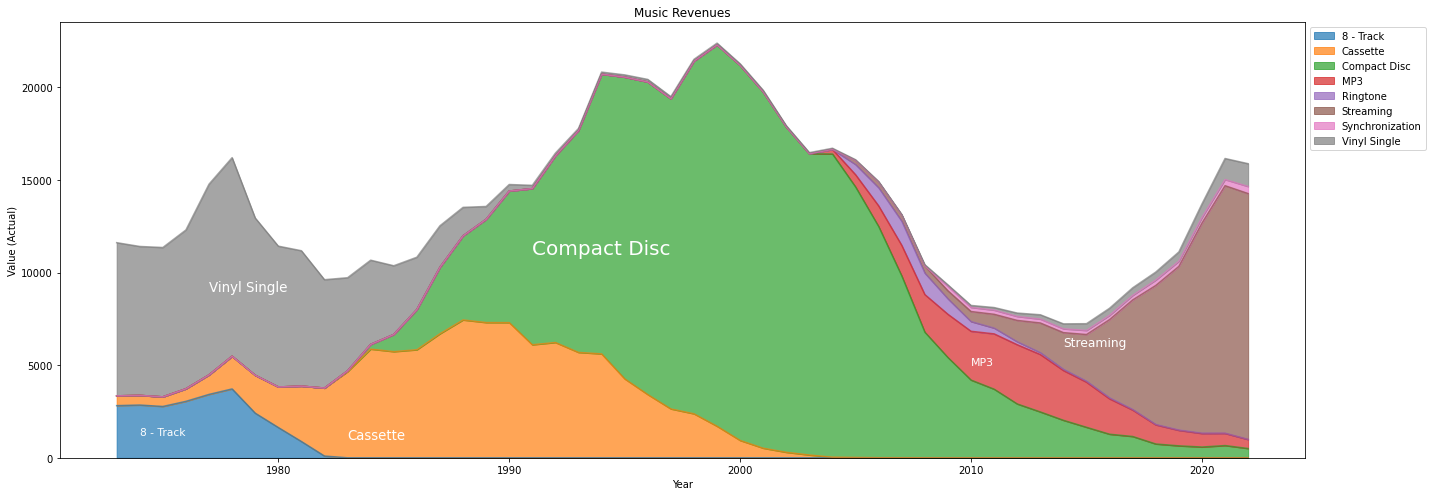

In [21]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value (Actual)', aggfunc='sum')

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(20, 7))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Music Revenues')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Actual)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Compute the area of each stack
areas = pivot_area.sum(axis=0)

# Normalize the areas to get values between 10 and 20 for font sizes
min_font_size = 10
max_font_size = 20
normalized_areas = (areas - areas.min()) / (areas.max() - areas.min())
font_sizes = min_font_size + normalized_areas * (max_font_size - min_font_size)

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1974, 1200), (1991, 11000), (1983, 1000), (2010, 5000), (1977, 9000), (2014, 6000)]

for format_, position in zip(formats, positions):
    ax.text(position[0], position[1], format_, fontsize=font_sizes[format_], color='white')

# Show the chart
plt.tight_layout()
plt.show()

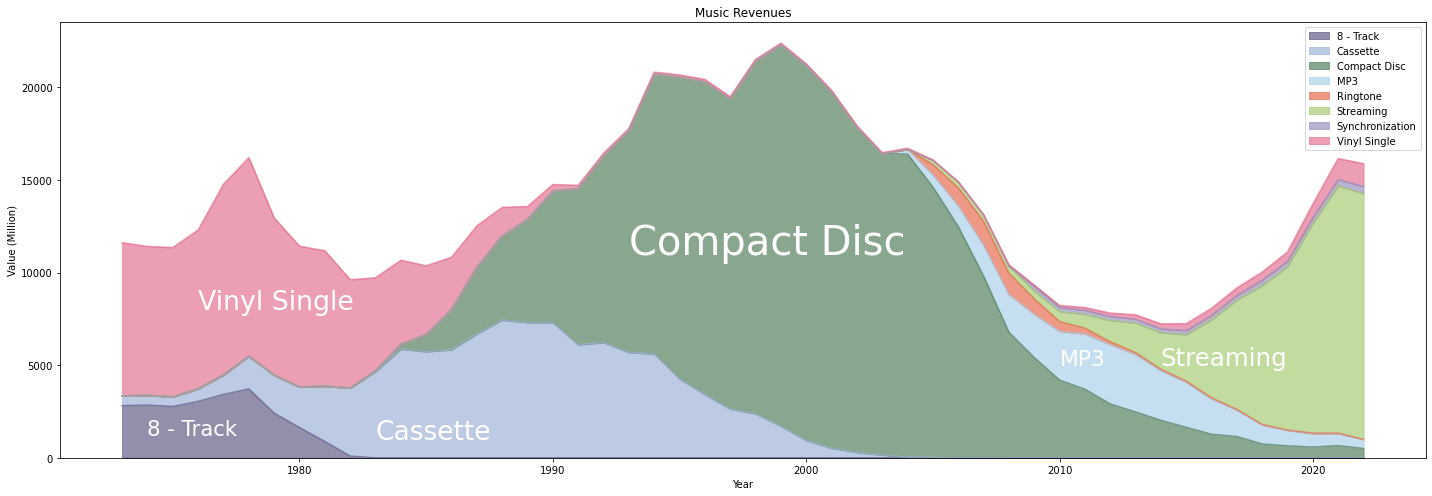

In [22]:
import matplotlib.pyplot as plt

# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value (Actual)', aggfunc='sum')

# Custom colors for the stacks
colors = {
    '8 - Track': '#665e86',
    'Compact Disc': '#56825f',
    'Cassette': '#a1b4d8',
    'MP3': '#aed2eb', # Modified color code
    'Vinyl Single':'#e47594' ,
    'Streaming': '#a9cd75',
    'Ringtone': '#e76e51',
    'Synchronization': '#9894c0'
}

# Create the stacked area chart with the specified colors
fig, ax = plt.subplots(figsize=(20, 7))
pivot_area.plot(kind='area', stacked=True, color=[colors[col] for col in pivot_area.columns], alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Music Revenues')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Million)')
ax.legend(loc='upper right')

# Compute the area of each stack
areas = pivot_area.sum(axis=0)

# Normalize the areas to get values between 10 and 20 for font sizes
min_font_size = 20
max_font_size = 40
normalized_areas = (areas - areas.min()) / (areas.max() - areas.min())
font_sizes = min_font_size + normalized_areas * (max_font_size - min_font_size)

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1974, 1200), (1993, 11000), (1983, 1000), (2010, 5000), (1976, 8000), (2014, 5000)]

for format_, position in zip(formats, positions):
    ax.text(position[0], position[1], format_, fontsize=font_sizes[format_], color='white')

# Show the chart
plt.tight_layout()
plt.show()
